In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import MaxPooling2D,Conv2D


Using TensorFlow backend.


In [0]:
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
#display the first samples from training and testing data
print(train_X.shape,train_Y.shape,test_X.shape,test_Y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


Text(0.5, 1.0, 'Ground Truth: [3]')

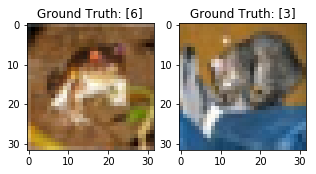

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[5,5])
#first img in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:])
plt.title('Ground Truth: {}'.format(train_Y[0]))

#first img in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:])
plt.title('Ground Truth: {}'.format(test_Y[0]))

In [0]:
#Hyperparameters
batch_size=32
num_classes=10
epochs=100
data_augmentation=True
num_predictions=20


In [0]:
#one-hot encoding of labels
train_Y_one_hot=keras.utils.to_categorical(train_Y,num_classes)
test_Y_one_hot=keras.utils.to_categorical(test_Y,num_classes)
train_Y_one_hot.shape,test_Y_one_hot.shape

((50000, 10), (10000, 10))

In [0]:
#create validation set
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label=train_test_split(train_X,train_Y_one_hot,test_size=0.2,random_state=13)

In [0]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

In [0]:
#Model
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=train_X.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

W0802 17:05:59.259898 140169084983168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 17:05:59.305190 140169084983168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 17:05:59.326079 140169084983168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 17:05:59.400311 140169084983168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0802 17:05:59.407142 140169084983168 deprecation_wrapp

In [0]:
#RMSProp Optimizer [TODO: Try with other optimizers (Adam etc) as well]
opt=keras.optimizers.rmsprop(lr=0.0001,decay=1e-6)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [0]:
#Preprocess training data before fitting it in the model
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
train_X/=255
test_X/=255
valid_X=valid_X.astype('float32')
valid_X/=255

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

W0802 17:06:13.134792 140169084983168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0802 17:06:13.159820 140169084983168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
import math
if not data_augmentation:
  print('Not using Data Augmentation')
  model.fit(train_X,train_label,batch_size=batch_size,epochs=20,validation_data=(valid_X,valid_labels),shuffle=True)
else:
  print('Using Real Time Data Augmentation')
  #Taken from https://keras.io/examples/cifar10_cnn/
  datagen=ImageDataGenerator(
  featurewise_center=False,
  samplewise_center=False,
  featurewise_std_normalization=False,
  samplewise_std_normalization=False,
  zca_whitening=False,
  zca_epsilon=1e-6,
  rotation_range=0,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.,
  zoom_range=0.,
  channel_shift_range=0.,
  fill_mode='nearest',
  cval=0,
  horizontal_flip=True,
  vertical_flip=False,
  rescale=None,
  preprocessing_function=None,
  data_format=None,
  validation_split=0.8)
  
  datagen.fit(train_X)
  model.fit_generator(datagen.flow(train_X, train_label,
                                     batch_size=batch_size),
                        epochs=20,
                        validation_data=(valid_X, valid_label),workers=4,steps_per_epoch=math.ceil(len(train_X)/batch_size))

  

Using Real Time Data Augmentation
Epoch 1/20
1250/1250 [==============================] - 235s 188ms/step - loss: 1.8890 - acc: 0.3028 - val_loss: 1.5540 - val_acc: 0.4365
Epoch 2/20
1250/1250 [==============================] - 237s 189ms/step - loss: 1.6102 - acc: 0.4093 - val_loss: 1.4631 - val_acc: 0.4753
Epoch 3/20
1250/1250 [==============================] - 236s 189ms/step - loss: 1.4984 - acc: 0.4522 - val_loss: 1.3561 - val_acc: 0.5108
Epoch 4/20
1250/1250 [==============================] - 234s 187ms/step - loss: 1.4254 - acc: 0.4832 - val_loss: 1.2715 - val_acc: 0.5430
Epoch 5/20
1250/1250 [==============================] - 233s 186ms/step - loss: 1.3587 - acc: 0.5097 - val_loss: 1.3346 - val_acc: 0.5346
Epoch 6/20
1250/1250 [==============================] - 234s 187ms/step - loss: 1.3028 - acc: 0.5345 - val_loss: 1.1357 - val_acc: 0.5973
Epoch 7/20
1250/1250 [==============================] - 238s 190ms/step - loss: 1.2598 - acc: 0.5543 - val_loss: 1.1972 - val_acc: 0.5832


In [0]:
model.save('cifarCNN.h5py')

In [0]:
test_eval=model.evaluate(test_X,test_Y_one_hot,verbose=1)

10000/10000 [==============================] - 13s 1ms/step


In [0]:
print('Test Loss: ',test_eval[0])
print('Test Accuracy: ',test_eval[1])

Test Loss:  0.885490220451355
Test Accuracy:  0.6905


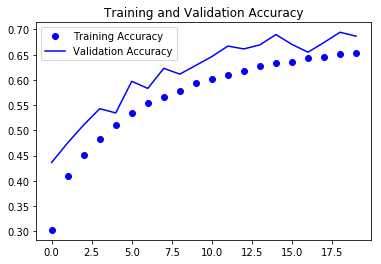

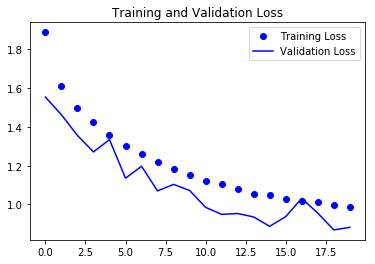

In [0]:
#The accuracy is seen to improve with increasing the number of epochs. The model still underfits though (I think)
#Graphical Representation
accuracy=model.history.history['acc']
val_accuracy=model.history.history['val_acc']
loss=model.history.history['loss']
val_loss=model.history.history['val_loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#Note: Lines [3-6] show ' '.history.history because of the following error when 
#putting only one .history: Python: Neural Network - TypeError: 'History' object is not subscriptable

#We can also see from the graph that the model is slightly undefitting. Increasing number of epochs should rectify this

In [0]:
#Predicting Labels
import numpy as np
predicted_classes=model.predict(test_X)
predicted_classes=np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape,test_Y.shape

((10000,), (10000, 1))

In [0]:
from sklearn.metrics import classification_report

target_names=['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(test_Y,predicted_classes,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.24      0.89      0.38      1000
     Class 1       0.87      0.82      0.84      1000
     Class 2       0.91      0.21      0.34      1000
     Class 3       0.78      0.12      0.21      1000
     Class 4       0.78      0.40      0.52      1000
     Class 5       0.75      0.38      0.50      1000
     Class 6       0.69      0.81      0.74      1000
     Class 7       0.80      0.72      0.76      1000
     Class 8       0.93      0.69      0.79      1000
     Class 9       0.77      0.85      0.81      1000

    accuracy                           0.59     10000
   macro avg       0.75      0.59      0.59     10000
weighted avg       0.75      0.59      0.59     10000

